### Robot Learning

### Assignment 2

Solutions are due on 29.04.2025 before the lecture.

### Introduction

Consider the following $9 \times 9$ grid world:

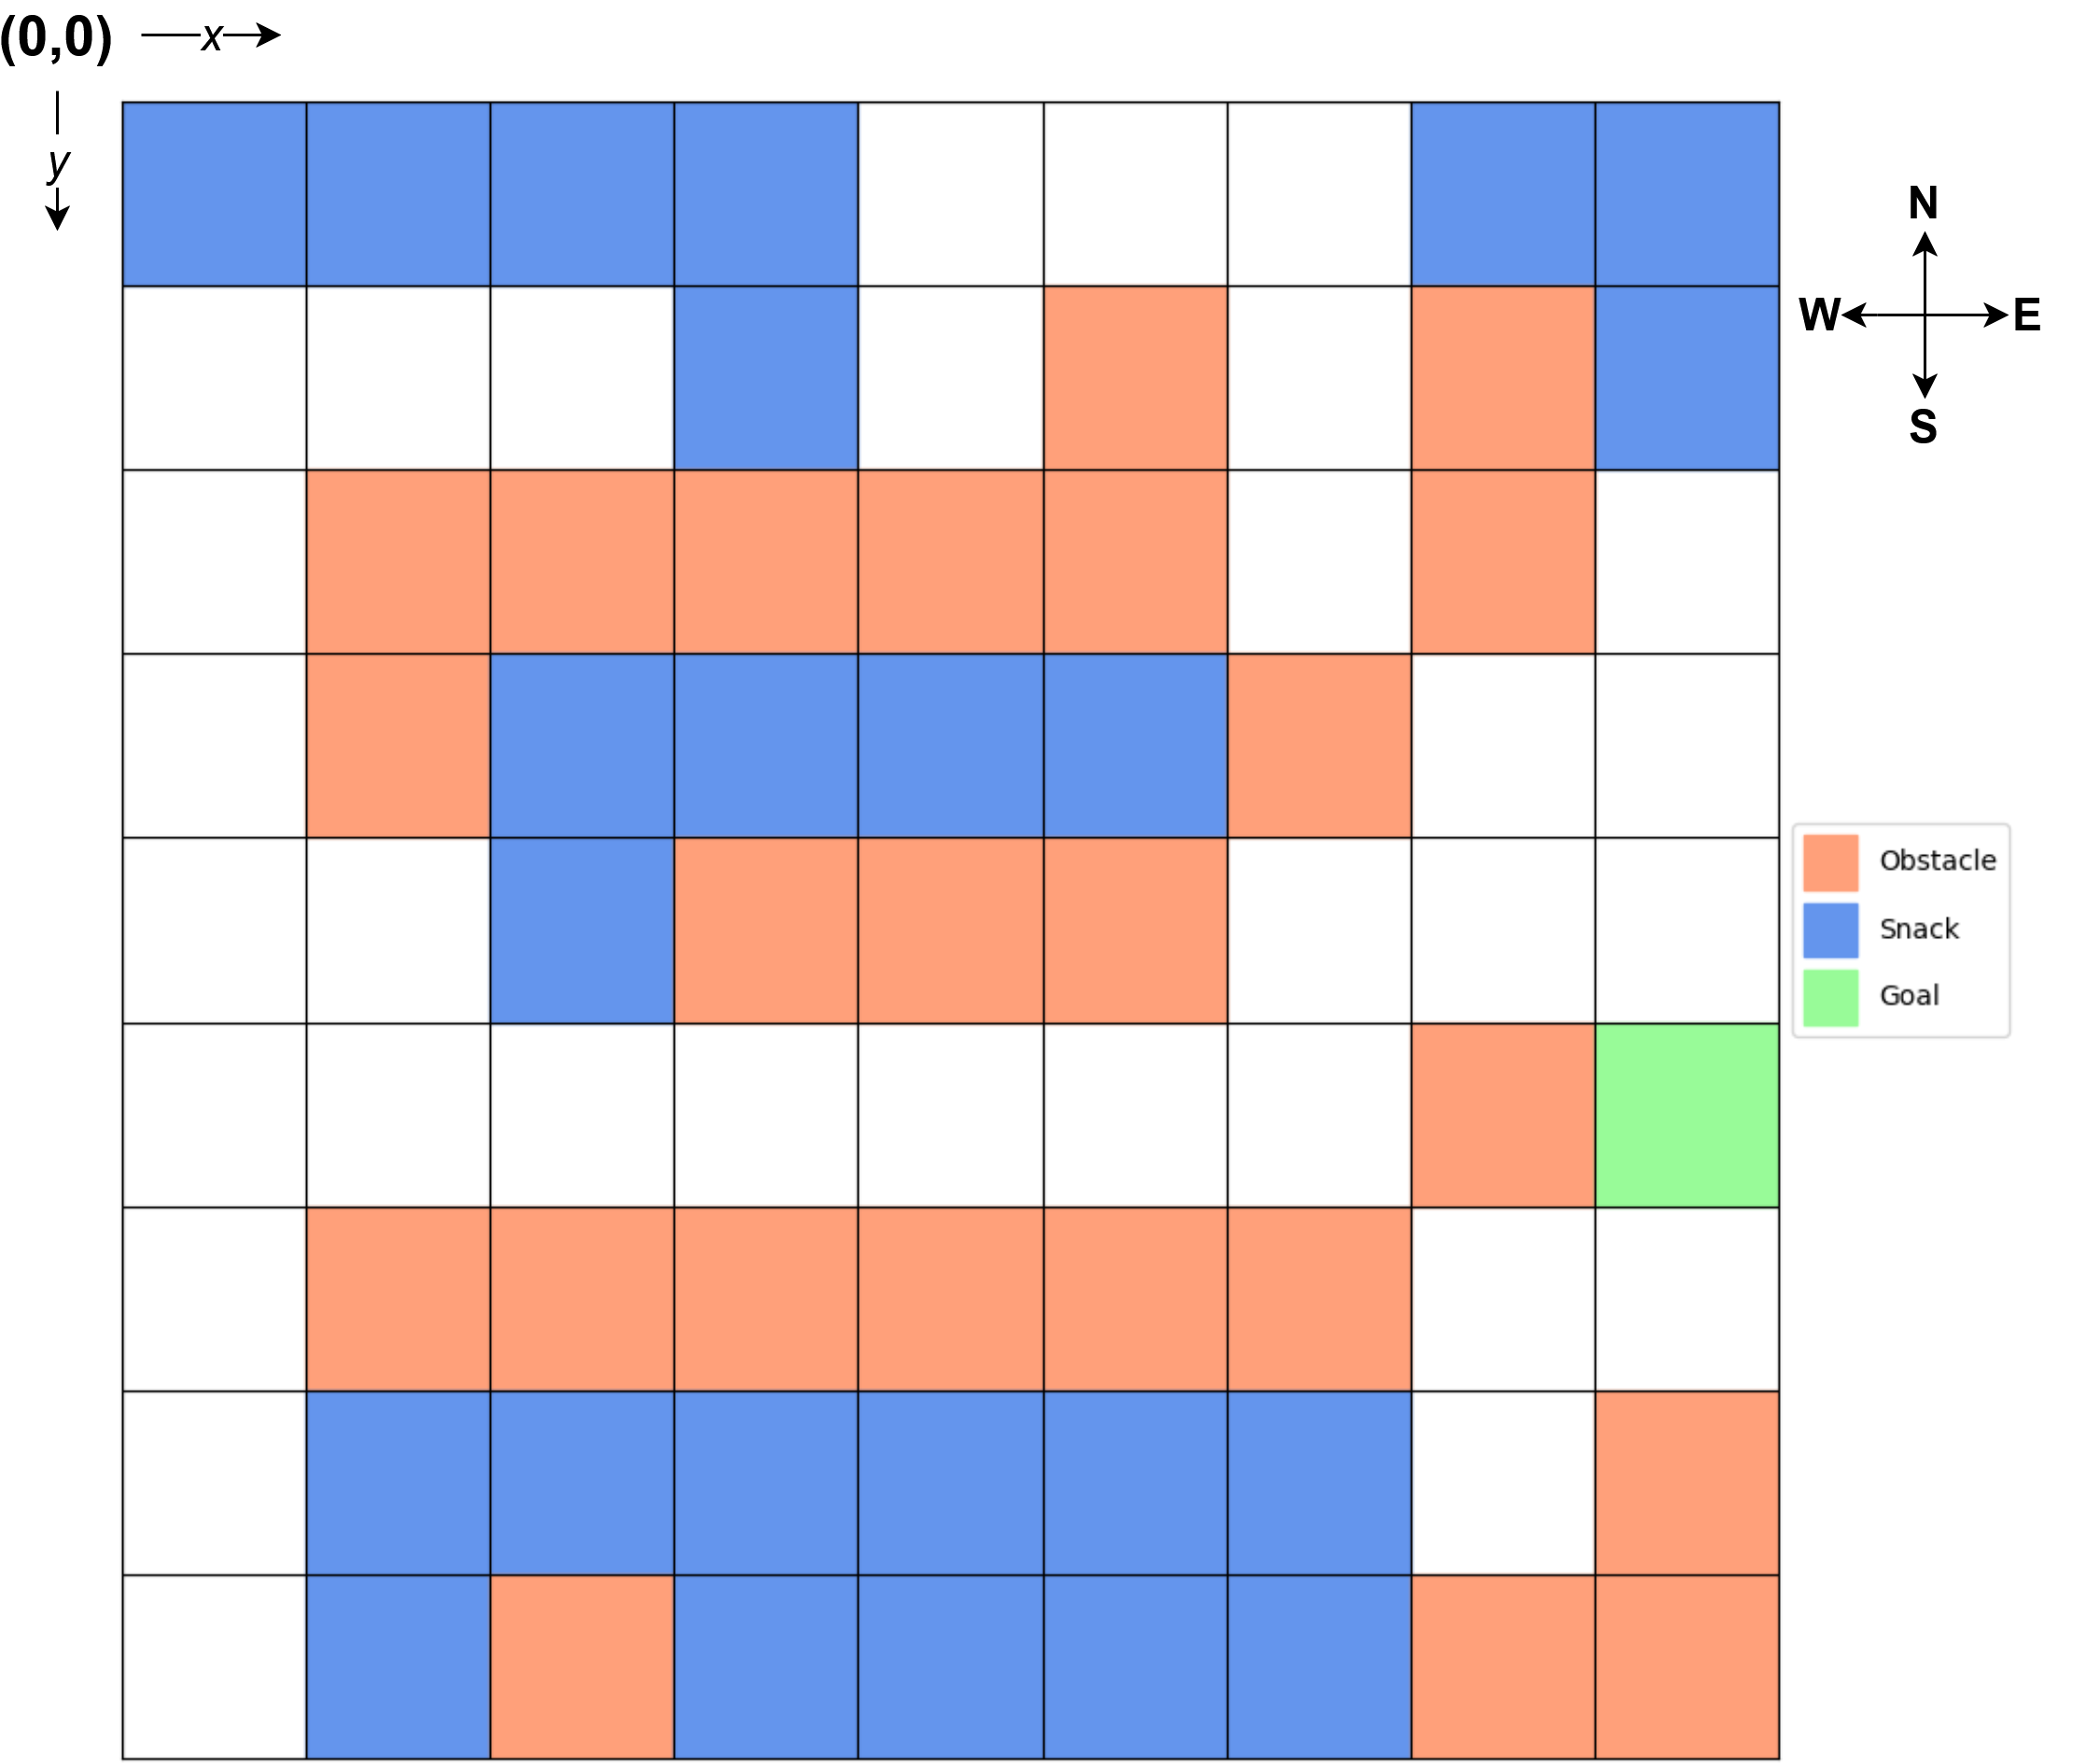

In [1]:
from IPython.display import Image, display
display(Image(filename='helpers/rl_grid_sketch_25.png', width=650))

The agent may start in any cell that is not an obstacle nor the goal.

It can choose between eight actions, which correspond to moving to the directions 

$$a_i \in \{NW,      N,      NE,     E,     SE,    S,     SW,     W\}$$

These are indexed according to the order above, i.e. $a_0 = NW$ and $a_6 = SW$.

The agent must be careful, for the actions are non-deterministic! The agent moves with probability $0.8$ into the desired
direction, but with probability $0.15$ deviates $45^{\circ}$ to the left and with probability $0.05$ deviates $45^{\circ}$ 
to the right of the desired direction due to treacherous gusts unexpectedly sweeping the grid.

The rewards are structured as follows:

* When it reaches a blue cell, it receives a little snack of 16 points.

* When it attempts to enter a red obstacle cell, it receives -32 points and stays in the cell it came from.

* When it attempts to leave the grid, it receives -32 points and stays in the cell it came from.

* When the agent reaches the green goal cell, it receives 180 points and the episode ends.

* All other actions entering a white cell receive -1 point.

## Task 2.1

To familiarize yourself with the environment above, answer the following questions:

* The agent is at $s = (y_s, x_s) = (3, 5)$ and wants to execute $a_5$. What is the probability $P^a_{s,s'}$ for $s' =(4,6)$?


* The agent is at $s = (4, 7)$ and wants to execute $a_3$. What is the expected value of the reward?

<div style="text-align: right; font-weight:bold"> 1 + 2 = 3 Points </div>

### First Part

Since $a_5 = S$ and we need to move $SE$ to get to $(4, 6)$, so we need to take
the chance of deviating $45\degree$ to the left, which comes with the
probability of $0.15$.

In [2]:
from helpers.utils import getNextStatesRewardsAndProbabilities

print(
	sum(
		probability
		for new_state, _, probability in
        	getNextStatesRewardsAndProbabilities(state=(3,5), action=5)
		if new_state == (4, 6)
	)
)

0.15


### Second Part

- $a_3 = E$ which will end a white cell with $0.8$ probability. So the expected
  reward is $0.8 \times -1 = -0.8$.
- Or it could deviates to $NE$ with the probability of $0.15$ and land on a
  white cell. So the expected reward is $0.15 \times -1 = -0.15$.
- Or it could deviates to $SE$ with the probability of $0.05$ and land on the
  goal. So the expected reward is $0.05 \times 180 = 9$.

So the expected overall reward is $9 - 0.8 - 0.15 = 8.05$

In [3]:
print(
	sum(
		probability * reward
		for _, reward, probability in
        	getNextStatesRewardsAndProbabilities(state=(4,7), action=3)
	)
)

8.05


## Task 2.2)

Using the *Iterative Policy Evaluation* Algorithm, compute the value $V^{\pi}(s)$ of all accessible cells $s$ for a policy $\pi(s,a)$ that chooses with probability $0.5$ a random action and otherwise attempts to move to the right.

Intialize $V(s)$ with zero, use a discount parameter of $\gamma=0.9$ and show your results by printing your state values $V^{\pi}(s)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

#### Note

For your convenience, you are provided the helper function *getNextStatesRewardsAndProbabilities(state, action)* which returns for a given state $s$ and an action $a$ a list of 3 -tuples of the form

$$[(s_0', R^a_{s,s_0'}, P^a_{s,s_0'}), (s_1', R^a_{s,s_1'}, P^a_{s,s_1'}), \dots]$$

where $s_i'$ are all future states with $P^a_{s,s_i'} \neq 0$. Here $s = (y, x)$ and $s_i' = (y_i', x_i')$ are both tuples of integers, $a \in {0, \dots, 7}$ is an integer, and $R^a_{s,s_i'}$, $P^a_{s,s_i'}$ are both floats.

Also, please find below some data structures which you might find helpful. Create code and text cells as necessary to present your solution!

In your implementation, $V(s)$ should be a $9 \times 9$ numpy array and $\pi(s,a)$ should be a $9 \times 9 \times 8$ numpy array, where $\sum_a \pi(s,a) = 1$ for all s!

In [4]:
import numpy as np
from helpers.utils import getNextStatesRewardsAndProbabilities
%matplotlib inline

#this is a list of all states
states = [(y,x) for y in range(9) for x in range(9)]
#this is a list of all states containing obstacles
obstacles = [(1,5), (1,7), \
             (2,1), (2,2), (2,3), (2,4), (2,5), (2,7),\
             (3,1), (3,6), \
             (4,3), (4,4), (4,5), \
             (5,7), \
             (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), \
             (7,8), \
             (8,2), (8,7), (8,8)]
#this is a list containing all blue cells
snacks = [(0,0), (0,1), (0,2), (0,3), (0,7), (0,8), \
          (1,3), (1,8), \
          (3,2), (3,3), (3,4), (3,5), \
          (4,2), \
          (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), \
          (8,1), (8,3), (8,4), (8,5), (8,6)]
#this is a list containing all goal states
terminalStates = [(5,8)]
#this is an array containing all actions
actions = np.array([0, 1, 2, 3, 4, 5, 6, 7]) #[NW,      N,      NE,     E,     SE,    S,     SW,     W]
#example of how to unpack getNextStatesRewardsAndProbabilities(state, action):
#create dummy state and action
s_test = (0,6)
a_test = 3
#call helper function and loop over the return values
for sPrime, R, P in getNextStatesRewardsAndProbabilities(state=s_test, action=a_test):
    print('sPrime:', sPrime, 'R:', R, 'P:', P)
    
#once you have state values V, you can print them with okay'ish formatting like so:
#print("State Values:")
#print(np.around(V, 1))

sPrime: (0, 6) R: -32.0 P: 0.15
sPrime: (0, 7) R: 16.0 P: 0.8
sPrime: (0, 6) R: -32.0 P: 0.05


First we start by introducing "some quality of life" utilities.

In [5]:
NW, N, NE, E, SE, S, SW, W = range(8)
discount = 0.9

Now we define our "drunk pirate that keeps drifting right walk" policy, by
storing the probability of each action as vector in each cell.

- So each action will have the probability of
  $\frac{1}{2} \times \frac{1}{8} = 0.0625$.
- but since we drifts right every once and a while the probability at `E` will be
  $\frac{1}{2} \times \frac{1}{8} + \frac{1}{2} = 0.5625$.

In [6]:
def random_right_policy() -> np.typing.NDArray:
	"""A policy that moves in any direction with the probability of 0.5 or just
	moves to the right with the probability of 0.5.
	"""
	policy = np.ones((9, 9, actions.size)) * (0.5 / actions.size)
	policy[:, :, E] += 0.5
	return policy

Checking that $\sum_a \pi(s,a) = 1$ for all s

In [7]:
random_right_policy().sum(2)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Now computing the `evaluation` matrix. We will include every possible, even the impossible ones (i.e. the ones were the agent is inside of an obsticle)

In [8]:
def evaluate(
    policy: np.typing.NDArray,
    convergence_threshold: float = 1e-4,
    evaluate_obstables: bool = True,
) -> np.typing.NDArray:
    evaluation = np.zeros((9, 9))
    diff = float("inf")

    while diff > convergence_threshold:
        diff = 0
        new_evaluation = np.copy(evaluation)
        for state in states:
            if not evaluate_obstables and state in obstacles:
                continue
            y, x = state
            v = 0
            for action in actions:
                sub_sum = 0
                for new_state, reward, probability in getNextStatesRewardsAndProbabilities((y, x), action):
                    new_y, new_x = new_state
                    sub_sum += probability * (reward + discount * evaluation[new_y, new_x])
                v += policy[y, x, action] * sub_sum
            diff = max(diff, abs(v - evaluation[y, x]))
            new_evaluation[y, x] = v
        evaluation = new_evaluation
    return evaluation

Introducing a handy function for displaying policy evaluations as a heat map

In [9]:
from matplotlib import pyplot as plt

def evaluation_heatmap(evaluation: np.typing.NDArray):
    ax = plt.subplot()
    img = ax.imshow(evaluation)
    cbar = ax.figure.colorbar(img)
    cbar.ax.set_ylabel("state value")

Let's the the evaluation of the `random_right_policy`

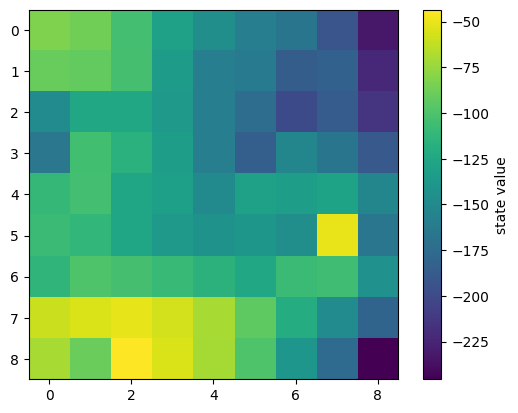

In [10]:
evaluation = evaluate(random_right_policy())
evaluation_heatmap(evaluation)

Since most of the actions are moving to the right, the values at the right most
cells should be low, also since the top left and the top right corner of the map
is mostly a snacks road, then the values should be high in these regions.

Also note that the obsticle cell which is to the left of the target cell has the
highest value since it's most likely that the agent will get to the target cell
if it's ever there.

## Task 2.3)

Now it is time to find a good policy. Use the *Policy Iteration* algorithm to compute the optimal value $V^*(s)$ for each accessible cell.

Retrieve the resulting optimal-policy $\pi^*(s)$. To obtain a greedy policy given $V(s)$, make use of:

$$\pi_{greedy}(s) := \operatorname{argmax}_a Q(s,a) = \operatorname{argmax}_a \sum_{s'}P_{ss'}^a\cdot[R_{ss'}^a+\gamma\cdot V(s')]$$

As implied by these terms, we recommend using intermediate state-action $Q$-values, shaped $9 \times 9 \times 8$ for this step!

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 5 Points </div>

In [11]:
from helpers.utils import drawPolicy, drawGrid
#show policy using helper function as below
#usage of the helper function, where pi is a (9,9,8) numpy array representing a deterministic policy:
#drawPolicy(pi)
#deterministic here means that one action per state has probability 1 and all others have probability 0
#this will plot arrows representing your policies into the grid world.

Setting our based policy $\pi$ which will be improved over time. We choose to
start with a truly random policy.

In [12]:
def random_policy() -> np.typing.NDArray:
    """A truly random policy, any action is expected. Should stay away from
    mf."""
    return np.ones((9, 9, 8)) * 1/8

Checking that $\sum_a \pi(s,a) = 1$ for all s

In [13]:
random_policy().sum(2)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

A quick over view before improvement iterations

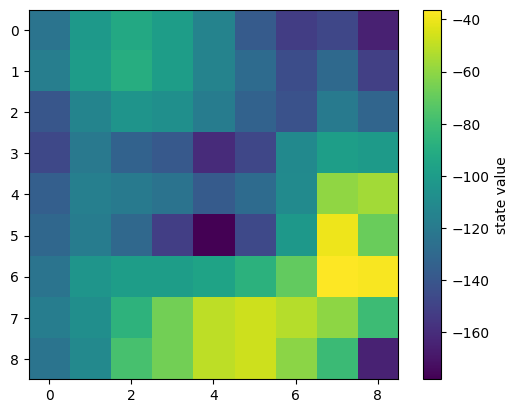

In [14]:
evaluation = evaluate(random_policy())
evaluation_heatmap(evaluation)

Now we're going to start an iterative process of estimating the value function
$V(s)$ and use that estimation to calculate a new and improved policy
$\pi(s, a)$ till we reach a "stable" situation (i.e. no improvements can be made
to the policy).

finished in 8 iteartions
[[277.226 301.444 330.434 353.362 390.893 455.184 450.314 488.508 480.969]
 [283.504 308.644 330.823 350.962 395.762 527.727 522.858 546.421 538.881]
 [294.049 379.438 426.023 475.919 532.745 532.745 605.478 623.726 623.726]
 [344.889 400.462 423.249 473.145 529.97  594.689 688.834 699.572 700.125]
 [352.897 400.137 430.788 480.684 537.51  612.888 687.284 783.978 779.109]
 [352.491 394.467 392.917 454.832 528.004 611.338 685.547 785.309 696.208]
 [387.533 431.954 469.671 508.891 545.841 607.513 679.628 780.901 779.109]
 [405.714 429.179 479.899 522.042 566.527 608.137 679.628 695.11  695.11 ]
 [404.164 436.718 480.045 519.76  564.127 615.337 620.135 620.135 601.56 ]]


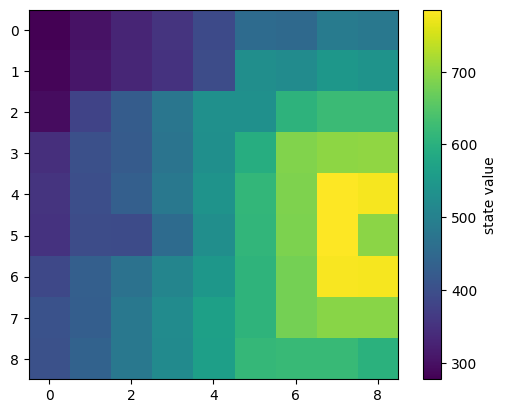

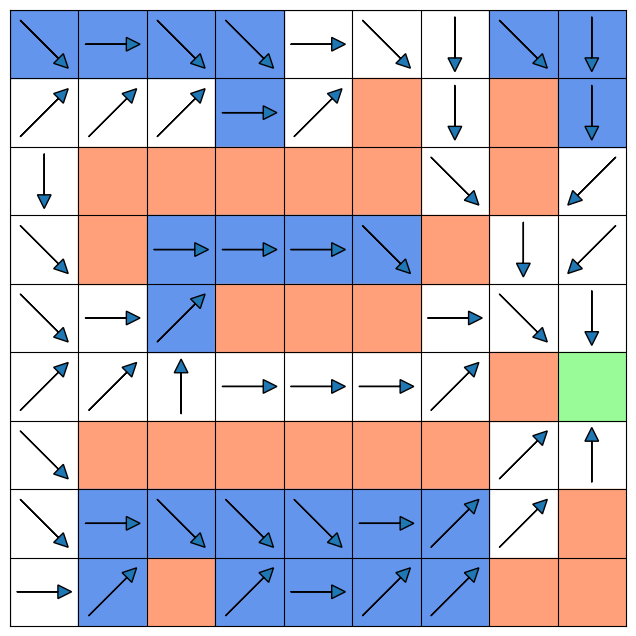

In [15]:
def iterate_policy(
    policy: np.typing.NDArray = random_policy(),
    max_iterations: int = 69,
    log: bool = True,
) -> np.typing.NDArray:
    """Improve the given ``policy`` using the Iterative Policy Algorithm in
    place."""
    for iteration in range(max_iterations):
        evaluation = evaluate(policy)
        new_policy = np.copy(policy)
        for state in states:
            y, x = state
            action_buf = np.zeros(8)
            for i, action in enumerate(actions):
                val = 0
                for new_state, reward, probability in getNextStatesRewardsAndProbabilities((y, x), action):
                    new_y, new_x = new_state
                    val += probability * (reward + discount * evaluation[new_y, new_x])
                action_buf[i] = val

            argmax = np.argmax(action_buf)
            new_policy[y, x, :] *= 0
            new_policy[y, x, argmax] = 1.0
        
        if np.array_equal(policy, new_policy):
            if log:
                print(f"finished in {iteration+1} iteartions")
            break
        policy = new_policy
    else:
        if log:
            print(f"exceeded {max_iterations} iterations")

    return policy

policy = iterate_policy()
evaluation = evaluate(policy)
evaluation_heatmap(evaluation)

with np.printoptions(precision=3, suppress=True):
    print(evaluation)

drawPolicy(policy)

Wow, that actually works.

PS. This might be the alcohol talking, but it looks like a semen petri dish.

## Task 2.4)

Verify your results from the previous task by using the *Value Iteration* algorithm to compute the optimal value $V^*(s)$ for each cell. Make sure to reinitialize $V(s)$ with zero.

Finally, present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

finished in 130 iterations
[[277.226 301.444 330.434 353.362 390.893 455.184 450.314 488.508 480.969]
 [283.504 308.644 330.823 350.962 395.762 527.727 522.858 546.421 538.881]
 [294.049 379.438 426.023 475.919 532.745 532.745 605.478 623.726 623.726]
 [344.889 400.462 423.249 473.145 529.97  594.689 688.834 699.572 700.125]
 [352.897 400.137 430.788 480.684 537.51  612.888 687.284 783.978 779.109]
 [352.491 394.467 392.917 454.832 528.004 611.338 685.547 785.309 696.208]
 [387.533 431.954 469.671 508.891 545.841 607.513 679.628 780.901 779.109]
 [405.714 429.179 479.899 522.042 566.527 608.137 679.628 695.11  695.11 ]
 [404.164 436.718 480.045 519.76  564.127 615.337 620.135 620.135 601.56 ]]


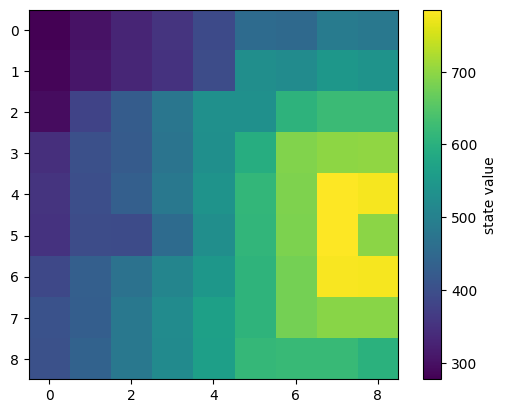

In [16]:
def value_iteration(
    convergence_threshold: float = 1e-4,
    evaluate_obstables: bool = True,
    max_iterations: int = 1000,
    deviation: bool = True,
    log: bool = True,
) -> np.typing.NDArray:
    """Compute the altimate value function."""
    evaluation = np.zeros((9, 9))

    for iteration in range(max_iterations):
        diff = 0
        new_evaluation = np.copy(evaluation)
        for state in states:
            if not evaluate_obstables and state in obstacles:
                continue
            y, x = state
            v = 0
            action_buf = np.zeros(8)
            for i, action in enumerate(actions):
                v = 0
                for new_state, reward, probability in \
                    getNextStatesRewardsAndProbabilities((y, x), action, deviation=deviation):
                    new_y, new_x = new_state
                    v += probability * (reward + discount * evaluation[new_y, new_x])
                action_buf[i] = v
            new_evaluation[y, x] = np.max(action_buf)
            diff = max(diff, abs(evaluation[y, x] - new_evaluation[y, x]))
        evaluation = new_evaluation
        if diff < convergence_threshold:
            if log:
                print(f"finished in {iteration+1} iterations")
            break
    else:
        if log:
            print(f"exceeded {max_iterations} iterations")

    return evaluation

evaluation = value_iteration()
evaluation_heatmap(evaluation)

with np.printoptions(precision=3, suppress=True):
    print(evaluation)

😱😱😱 That actually worked, but it alot more iterations to get to the same
value function we had in [task 2.3](#task-23).

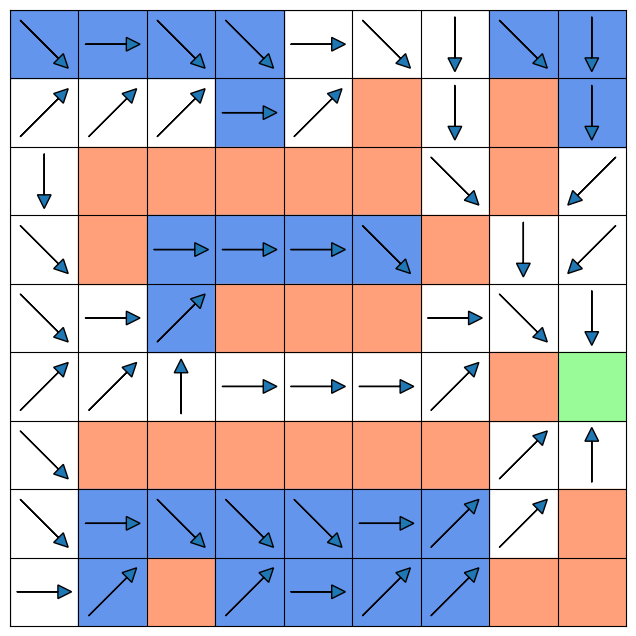

In [17]:
def compute_policy(evaluation: np.typing.NDArray) -> np.typing.NDArray:
    policy = np.zeros((9, 9, 8))
    for state in states:
        y, x = state
        v = 0
        action_buf = np.zeros(8)
        for i, action in enumerate(actions):
            v = 0
            for new_state, reward, probability in getNextStatesRewardsAndProbabilities((y, x), action):
                new_y, new_x = new_state
                v += probability * (reward + discount * evaluation[new_y, new_x])
            action_buf[i] = v

        argmax = np.argmax(action_buf)
        policy[y, x, :] *= 0
        policy[y, x, argmax] = 1.0
    return policy

evaluation = value_iteration(log=False)
policy = compute_policy(evaluation)
drawPolicy(policy)

It's alive 🙂

![It's alive](https://media4.giphy.com/media/3oEjI6hkw6nbYNQkz6/giphy.gif?cid=6c09b952g0oy255lp84wxhu31niphopn8tofnwalm3ll4fj9&ep=v1_internal_gif_by_id&rid=giphy.gif&ct=g)

## Task 2.5)

Modify your implementation of *Value Iteration* or *Policy Iteration* to ignore the random deviations in the environment. This can be achieved by calling *getNextStatesRewardsAndProbabilities(state, action, deviation=False)*.

Present your results by printing $V^*(s)$ and using our helper function *drawPolicy()* to visualize $\pi^*(s,a)$. How and why have your state values and policy changed?

<div style="text-align: right; font-weight:bold"> 3 Points </div>

finished in 138 iterations
[[405.139 432.376 462.64  496.267 552.519 615.021 615.021 632.021 632.021]
 [405.139 432.376 462.64  496.267 552.519 684.468 684.468 684.468 684.468]
 [447.431 554.73  598.589 647.321 701.468 701.468 761.631 761.631 761.631]
 [498.257 554.73  598.589 647.321 701.468 761.631 847.368 847.368 847.368]
 [498.257 554.73  598.589 647.321 701.468 761.631 847.368 942.631 942.631]
 [498.257 554.73  554.73  615.021 684.468 761.631 847.368 942.631 847.368]
 [525.295 565.884 610.982 661.091 716.768 778.631 847.368 942.631 942.631]
 [525.295 565.884 610.982 661.091 716.768 778.631 847.368 847.368 847.368]
 [525.295 565.884 610.982 661.091 716.768 778.631 778.631 778.631 761.631]]


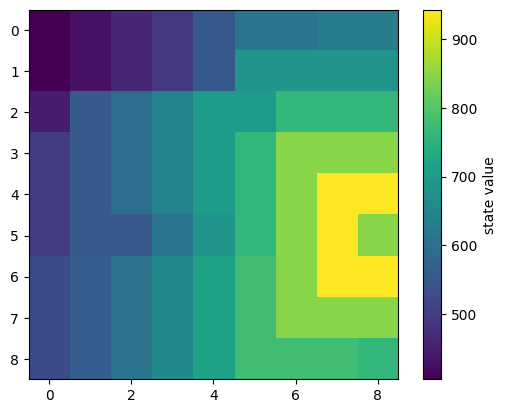

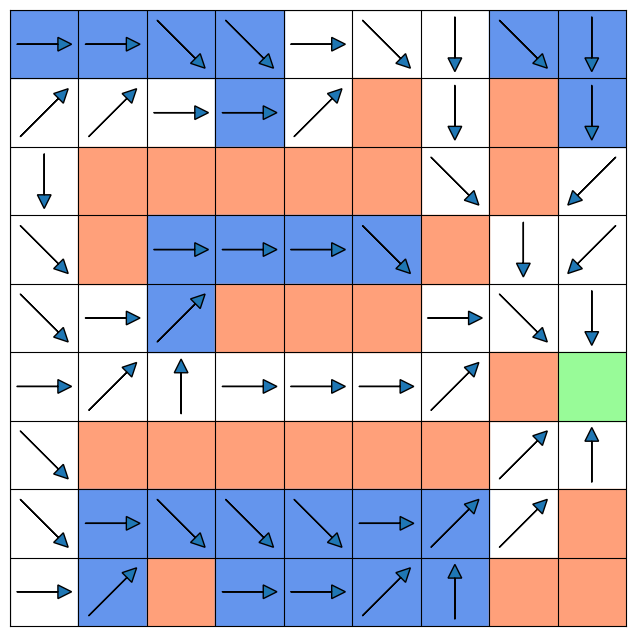

In [18]:
evaluation = value_iteration(deviation=False)
evaluation_heatmap(evaluation)

with np.printoptions(precision=3, suppress=True):
    print(evaluation)

policy = compute_policy(evaluation)
drawPolicy(policy)

There's an overall increase the in the state values (as indicated by the side
bar in the heatmap), and some policy seems to prefer shorter paths in the white
cells.

This is due to the fact that actions are deterministically perform and there no
chance for randomness.